# STC Lab 5A : Cyber Security using Machine Learning
<strong>Kaustubh Venkatesh<strong><br>
UID : 2018120033<br>
Roll No. : 36<br>
Date : 07-09-2020

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import time
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Import KDDCUP IDS Dataset 
url='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz'

In [3]:
#Reading the dataset
data = pd.read_csv('kddcup.csv')

#Giving the data set column names
data.columns = [
'duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'outcome'
]

data.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
#Shape of the data
data.shape

(494019, 42)

In [5]:
#Summary of the dataset
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494019.000000,4.940190e+05,4.940190e+05,494019.000000,494019.000000,494019.000000,494019.000000,494019.000000,494019.000000,494019.000000,...,494019.000000,494019.000000,494019.000000,494019.000000,494019.000000,494019.000000,494019.000000,494019.000000,494019.000000,494019.000000
mean,47.979497,3.025622e+03,8.685215e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148243,0.010212,...,232.471700,188.666416,0.753781,0.030906,0.601937,0.006684,0.176755,0.176443,0.058118,0.057412
std,707.747898,9.882201e+05,3.304007e+04,0.006673,0.134806,0.005510,0.782104,0.015520,0.355341,1.798330,...,64.743886,106.040004,0.410780,0.109259,0.481309,0.042133,0.380594,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#data types of the features
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [7]:
#Type of attacks by number
data.groupby(data.outcome)["outcome"].count()

outcome
back.                 2203
buffer_overflow.        30
ftp_write.               8
guess_passwd.           53
imap.                   12
ipsweep.              1247
land.                   21
loadmodule.              9
multihop.                7
neptune.            107201
nmap.                  231
normal.              97276
perl.                    3
phf.                     4
pod.                   264
portsweep.            1040
rootkit.                10
satan.                1589
smurf.              280790
spy.                     2
teardrop.              979
warezclient.          1020
warezmaster.            20
Name: outcome, dtype: int64

In [8]:
#type of outcome of attacks
data.outcome.unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

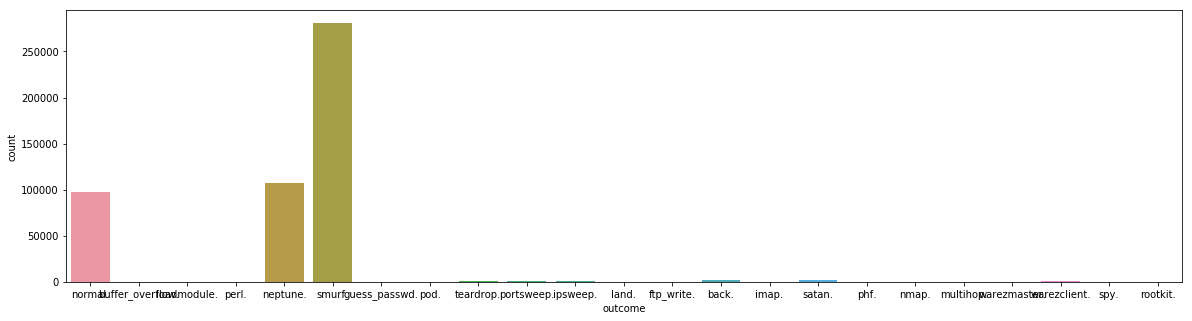

In [9]:
#plotting the data
plt.figure(figsize = (20,5))
sns.countplot(data.outcome)

In [10]:
#Mapping the different types of attacks to their respective categories
data = data.replace(to_replace = ["ipsweep.","portsweep.","nmap.","satan."],value = "probe")
data = data.replace(to_replace = ["ftp_write.", "guess_passwd.","imap.","multihop.","phf.","spy.", "warezclient.","warezmaster."],value = "r2l")
data = data.replace(to_replace = ["buffer_overflow.","loadmodule.","perl.", "rootkit."],value = "u2r")
data = data.replace(to_replace = ["back.", "land." ,"neptune.", "pod.","smurf.","teardrop."], value = "dos")

In [11]:
#Type of attacks by number
data.groupby(data.outcome)["outcome"].count()

outcome
dos        391458
normal.     97276
probe        4107
r2l          1126
u2r            52
Name: outcome, dtype: int64

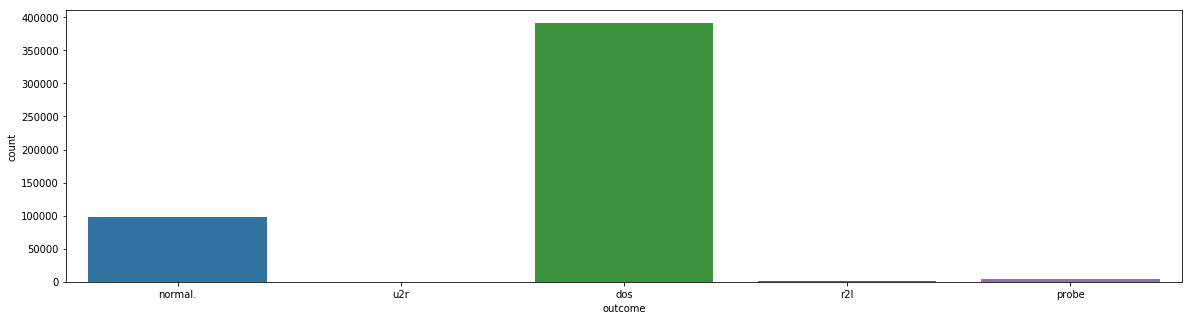

In [12]:
#plotting the new dataset
plt.figure(figsize = (20,5))
sns.countplot(data.outcome)

In [13]:
#Data Preprocessing : label encoding
le = LabelEncoder()

data['protocol_type'] = le.fit_transform(data['protocol_type'])
data['service'] = le.fit_transform(data['service'])
data['flag'] = le.fit_transform(data['flag'])
data['outcome'] = le.fit_transform(data['outcome'])

In [2]:
#Splitting data into feature and target sets
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

NameError: name 'data' is not defined

In [15]:
#splitting the data sets into test and train data sets
#use k-fold cross validation to check splitting ratio : Split into k folds and use each fold as test and others
#as train and evaluate each split set and select the best combination

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
#Creating the model : Logistic Regression
lr = LogisticRegression()
st = time.time() #To measure the time taken to train the model
#Training the model
lr.fit(X_train,y_train)
et = time.time()
print("Training time : {:.3f} s".format(et-st))


C:\Users\Kaustubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kaustubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training time : 75.925 s


C:\Users\Kaustubh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [17]:
#Prediction of values using the model
st = time.time()
y_pred = lr.predict(X_test)
et = time.time()
print("Prediction time : {:.3f} s".format(et-st))
print("Predicted Values : ")
y_pred = pd.DataFrame(y_pred, columns = ["value"])
y_pred.groupby('value')['value'].count()

Prediction time : 0.027 s
Predicted Values : 


value
0    78109
1    20426
2      230
3       38
4        1
Name: value, dtype: int64

In [18]:
#model accuracy
acc_lr = 100 * lr.score(X_test,y_test)
print("Model Score : {:.3f} %".format(acc_lr))

Model Score : 98.429 %


In [19]:
#Confusion Matrix
confusion_matrix(y_pred,y_test)

array([[77630,    96,   350,    33,     0],
       [  616, 19384,   225,   184,    17],
       [    3,     2,   225,     0,     0],
       [   17,     9,     0,    12,     0],
       [    0,     0,     0,     0,     1]], dtype=int64)

In [20]:
#Classification Report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     78109
           1       0.99      0.95      0.97     20426
           2       0.28      0.98      0.44       230
           3       0.05      0.32      0.09        38
           4       0.06      1.00      0.11         1

   micro avg       0.98      0.98      0.98     98804
   macro avg       0.48      0.85      0.52     98804
weighted avg       0.99      0.98      0.99     98804



In [21]:
#Creating the model : Decision Tree Classifier
dtc = DecisionTreeClassifier()
st = time.time()
#Fitting the data into the model
dtc.fit(X_train,y_train)
et = time.time()
print("Training time : {:.3f} s".format(et-st))

Training time : 1.851 s


In [22]:
#Prediction of values using the model
st = time.time()
y_pred = dtc.predict(X_test)
et = time.time()
print("Prediction time : {:.3f} s".format(et-st))
print("Predicted Values : ")
y_pred = pd.DataFrame(y_pred, columns = ["value"])
y_pred.groupby('value')['value'].count()

Prediction time : 0.030 s
Predicted Values : 


value
0    78262
1    19496
2      806
3      228
4       12
Name: value, dtype: int64

In [23]:
#model accuracy
acc_dtc = 100 * dtc.score(X_test,y_test)
print("Model Score : {:.3f} %".format(acc_dtc))

Model Score : 99.949 %


In [24]:
#Confusion Matrix
confusion_matrix(y_pred,y_test)

array([[78259,     3,     0,     0,     0],
       [    6, 19470,     5,     7,     8],
       [    1,    10,   795,     0,     0],
       [    0,     8,     0,   220,     0],
       [    0,     0,     0,     2,    10]], dtype=int64)

In [25]:
#Classification Report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78262
           1       1.00      1.00      1.00     19496
           2       0.99      0.99      0.99       806
           3       0.96      0.96      0.96       228
           4       0.56      0.83      0.67        12

   micro avg       1.00      1.00      1.00     98804
   macro avg       0.90      0.96      0.92     98804
weighted avg       1.00      1.00      1.00     98804



In [26]:
#Creating the model : Random Forest Classifier
rfc = RandomForestClassifier()
st = time.time()
#Fitting the data into the model
rfc.fit(X_train,y_train)
et = time.time()
print("Training time : {:.3f} s".format(et-st))

C:\Users\Kaustubh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training time : 2.149 s


In [27]:
#Prediction of values using the model
st = time.time()
y_pred = rfc.predict(X_test)
et = time.time()
print("Prediction time : {:.3f} s".format(et-st))
print("Predicted Values : ")
y_pred = pd.DataFrame(y_pred, columns = ["value"])
y_pred.groupby('value')['value'].count()

Prediction time : 0.116 s
Predicted Values : 


value
0    78266
1    19516
2      794
3      222
4        6
Name: value, dtype: int64

In [28]:
#model accuracy
acc_rfc = 100 * rfc.score(X_test,y_test)
print("Model Score : {:.3f} %".format(acc_rfc))

Model Score : 99.967 %


In [29]:
#Confusion Matrix
confusion_matrix(y_pred,y_test)

array([[78265,     1,     0,     0,     0],
       [    1, 19488,     8,     7,    12],
       [    0,     2,   792,     0,     0],
       [    0,     0,     0,   221,     1],
       [    0,     0,     0,     1,     5]], dtype=int64)

In [30]:
#Classification Report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78266
           1       1.00      1.00      1.00     19516
           2       0.99      1.00      0.99       794
           3       0.97      1.00      0.98       222
           4       0.28      0.83      0.42         6

   micro avg       1.00      1.00      1.00     98804
   macro avg       0.85      0.96      0.88     98804
weighted avg       1.00      1.00      1.00     98804



In [31]:
#Creating model : KNN Classifier
clf = KNeighborsClassifier()
st = time.time()
#Fitting the data into the model
clf.fit(X_train,y_train)
et = time.time()
print("Training time : {:.3f} s".format(et-st))

Training time : 285.589 s


In [32]:
#Prediction of values using the model
st = time.time()
y_pred = clf.predict(X_test)
et = time.time()
print("Predicted Values : ")
y_pred = pd.DataFrame(y_pred, columns = ["value"])
y_pred.groupby('value')['value'].count()

Predicted Values : 


value
0    78300
1    19514
2      760
3      227
4        3
Name: value, dtype: int64

In [33]:
#Prediction Time
print("Prediction time : {:.3f} s".format(et-st))

Prediction time : 628.781 s


In [34]:
#model accuracy
acc_knn = 100 * clf.score(X_test,y_test)
print("Model Score : {:.3f} %".format(acc_knn))

Model Score : 99.867 %


In [35]:
#Confusion Matrix
confusion_matrix(y_pred,y_test)

array([[78254,     7,    39,     0,     0],
       [    9, 19459,    19,    12,    15],
       [    3,    14,   742,     1,     0],
       [    0,    10,     0,   216,     1],
       [    0,     1,     0,     0,     2]], dtype=int64)

In [36]:
#Classification Report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78300
           1       1.00      1.00      1.00     19514
           2       0.93      0.98      0.95       760
           3       0.94      0.95      0.95       227
           4       0.11      0.67      0.19         3

   micro avg       1.00      1.00      1.00     98804
   macro avg       0.80      0.92      0.82     98804
weighted avg       1.00      1.00      1.00     98804



In [37]:
print("Model Scores : ")
print("Logistic Regression Classifier : {:.3f} %".format(acc_lr))
print("Decision Tree Classifier : {:.3f} %".format(acc_dtc))
print("Random Forest Classifier : {:.3f} %".format(acc_rfc))
print("KNeighbour Classifier : {:.3f} %".format(acc_knn))


Model Scores : 
Logistic Regression Classifier : 98.429 %
Decision Tree Classifier : 99.949 %
Random Forest Classifier : 99.967 %
KNeighbour Classifier : 99.867 %


<style>
div.blue { background-color:#e6f0ff; border-radius: 5px; padding: 20px;}
</style>
<div class = "blue">
<strong>Conclusion : </strong>
<br/>
From the experiment conducted, it can be concluded that Machine Learning can be used to determine what kind of attack is being executed based on various networking parameters such as protocol, flag, count etc. and thus is an effective tool in Cyber Security. Various classification models have been used and the most suited for this application is Decision Tree Classifier which has the highest accuracy and lowest training time

</div>